In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qepsilon.utilities import Constants_Metal as Constants
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 5


hopping_in_meV = 83
rubrene_R = 7 * Constants.Angstrom
rubrene_V = hopping_in_meV * Constants.meV


## DMRG

In [2]:
## DMRG
data = np.loadtxt('mobility.csv', delimiter=',')
DMRG_temp = data[:,0]
DMRG_mobility  = (data[:,1] + data[:,2])/2

## DIQCD

In [3]:
DIQCD_temp = np.array([200, 250, 300, 350, 400])
DIQCD_mobility = []
ns = 150
for temp in DIQCD_temp:
    factor = rubrene_R ** 2/ Constants.cm**2 * Constants.eV / Constants.kb / temp / 2.0 * Constants.s / Constants.fs
    MSD_traj = np.load('../02.simulate_DIQCD/T{:.0f}_ns{}/MSD_traj.npy'.format(temp, ns))
    MSD_mean = MSD_traj.mean(-1)
    slope = (MSD_mean[99] - MSD_mean[49]) / 50
    mobility = slope * factor
    DIQCD_mobility.append(mobility)


## Ehrenfest

In [4]:
EF_temp = np.array([200, 250, 300, 350, 400])
EF_mobility = []
ns= 100
for temp in EF_temp:
    factor = rubrene_R ** 2/ Constants.cm**2 * Constants.eV / Constants.kb / temp / 2.0 * Constants.s / Constants.fs
    MSD_traj = np.load('../03.simulate_Ehrenfest/T{:.0f}_ns{}/MSD_traj.npy'.format(temp, ns))
    MSD_traj = MSD_traj.mean(-1)
    slope = (MSD_traj[199] - MSD_traj[99]) / 100
    mobility = slope * factor
    EF_mobility.append(mobility)



## plot

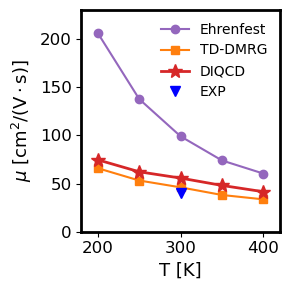

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.plot(EF_temp, EF_mobility, 'o-', label='Ehrenfest',   markersize=6,  color='tab:purple')
ax.plot(DMRG_temp, DMRG_mobility, 's-', label='TD-DMRG', markersize=6,  color='tab:orange')
ax.plot(DIQCD_temp, DIQCD_mobility, '*-', label='DIQCD', markersize=10, linewidth=2, color='tab:red')
ax.plot(300, 40, marker='v', markersize=7, linewidth=0,color='blue', label='EXP')
ax.set_ylim(0,230)
ax.set_xlim(180, 420)
ax.set_xlabel('T [K]', fontsize=13)
ax.set_ylabel(r'$\mu$ [$\mathrm{cm^2/(V\cdot s)}$]', fontsize=13)
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig('mobility_V{:.1f}meV.png'.format(hopping_in_meV), dpi=300)
plt.show()
plt.close()